<a href="https://colab.research.google.com/github/gauriWable/Sentiment-Analysis/blob/main/21_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


In [6]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
# display first 10 rows
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [7]:
# Data Summary
print("Data Summary:")
print(df.info())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


In [8]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
import numpy as np
import nltk
# download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# create a sentiment analyzer object
sid = SentimentIntensityAnalyzer()
# replace missing values with empty strings
df['Review Text'] = df['Review Text'].replace(np.nan, '', regex=True)
# iterate over the review text column and calculate the sentiment scores
sentiment_scores = []
for text in df['Review Text']:
    scores = sid.polarity_scores(text)
    sentiment_scores.append(scores['compound'])

# add the sentiment scores as a new column in the DataFrame
df['Sentiment Score'] = sentiment_scores
# define a function to map the compound scores to sentiment labels
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
# apply the get_sentiment_label function to the sentiment scores to get the sentimentb labels
sentiment_labels = df['Sentiment Score'].apply(get_sentiment_label)

# add the sentiment labels as a new column in the DataFrame
df['Sentiment Label'] = sentiment_labels
# display first 10 rows
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Score,Sentiment Label
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8932,Positive
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9729,Positive
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9427,Positive
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5727,Positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9291,Positive
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.9419,Positive
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.8004,Positive
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,-0.0909,Negative
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,0.7175,Positive
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,-0.3724,Negative


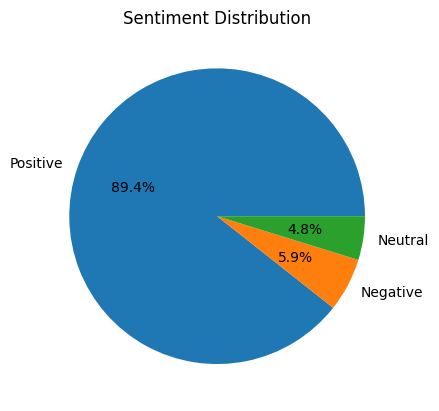

In [11]:
import matplotlib.pyplot as plt

#count the number of reviews for each sentiment label
sentiment_counts = df['Sentiment Label'].value_counts()
# create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct = '%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

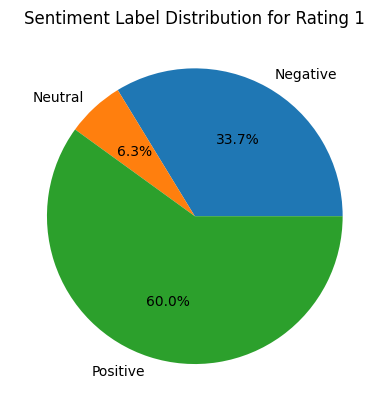

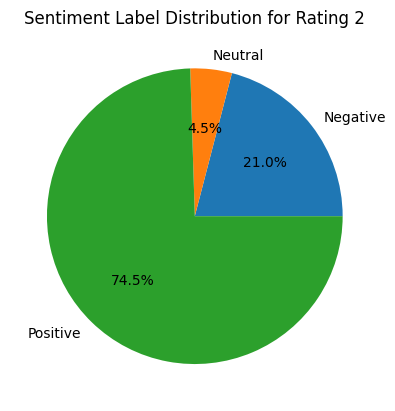

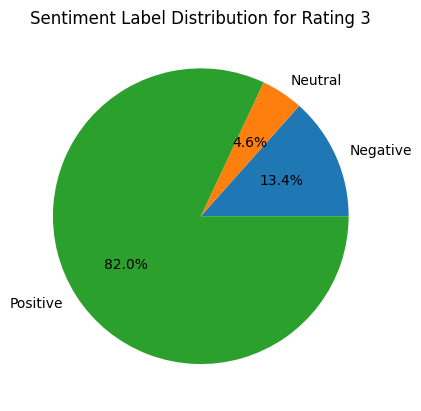

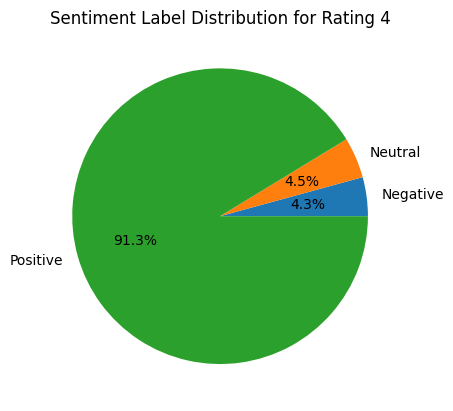

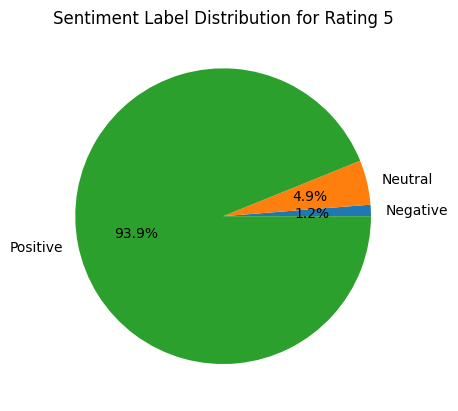

In [12]:
# group the data by rating and sentiment label, and count the number of reviews in each group
grouped= df.groupby(['Rating', 'Sentiment Label']).size().reset_index(name='Count')
# iterate over each rating and plot a pie chart of the sentiment label distribution
for rating in range(1,6):
    data = grouped[grouped['Rating'] == rating]
    plt.pie(data['Count'], labels = data['Sentiment Label'], autopct = '%1.1f%%')
    plt.title(f'Sentiment Label Distribution for Rating {rating}')
    plt.show()

<ipython-input-13-3aeccdd16689>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment Label', y='Rating', data=df, palette='Set2')


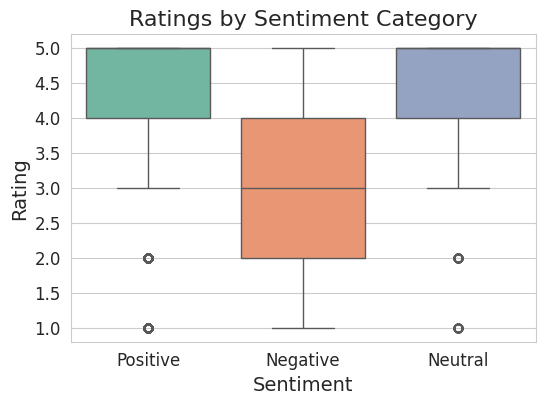

In [13]:
# Box Plot of Rating by Sentiment Label
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.boxplot(x='Sentiment Label', y='Rating', data=df, palette='Set2')
plt.title('Ratings by Sentiment Category', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 600x400 with 0 Axes>

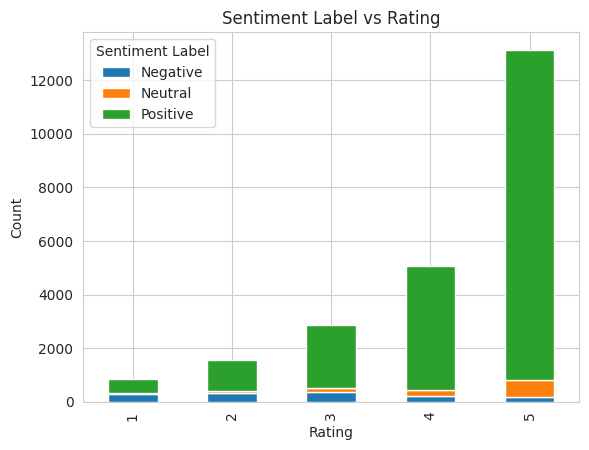

In [14]:
# plot the graph
fig = plt.figure(figsize = (6,4))
df.groupby(['Rating', 'Sentiment Label']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Sentiment Label vs Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

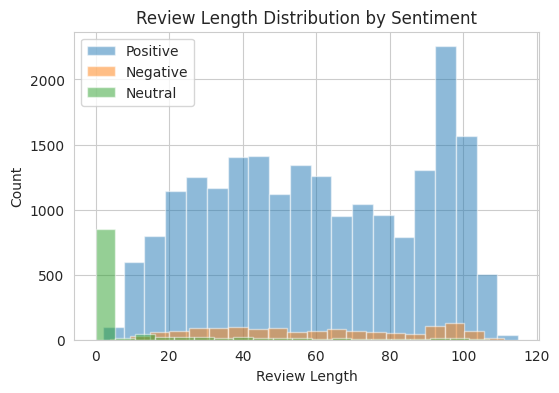

In [15]:
# Visualization: Review Length Analysis
df['Review Length'] = df['Review Text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6, 4))
plt.hist(df[df['Sentiment Label'] == 'Positive']['Review Length'], bins=20, alpha=0.5, label='Positive')
plt.hist(df[df['Sentiment Label'] == 'Negative']['Review Length'], bins=20, alpha=0.5, label='Negative')
plt.hist(df[df['Sentiment Label'] == 'Neutral']['Review Length'], bins=20, alpha=0.5, label='Neutral')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.legend()
plt.show()

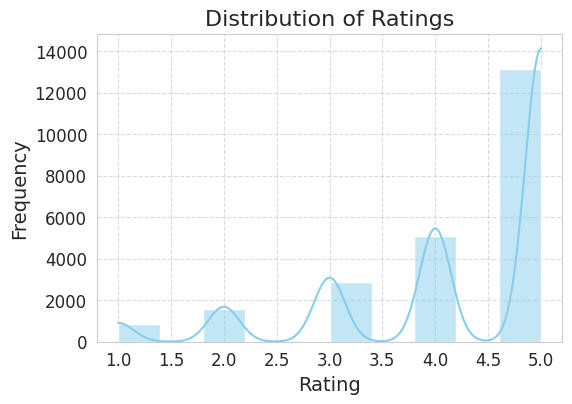

In [16]:
# Histogram of Ratings
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(df['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

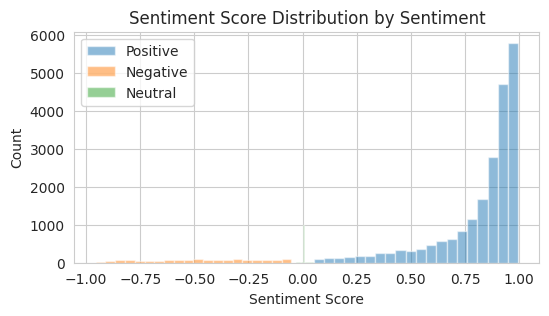

In [17]:
# Sentiment Score Distribution (Assuming you have sentiment scores)
plt.figure(figsize=(6, 3))
plt.hist(df[df['Sentiment Label'] == 'Positive']['Sentiment Score'], bins=20, alpha=0.5, label='Positive')
plt.hist(df[df['Sentiment Label'] == 'Negative']['Sentiment Score'], bins=20, alpha=0.5, label='Negative')
plt.hist(df[df['Sentiment Label'] == 'Neutral']['Sentiment Score'], bins=20, alpha=0.5, label='Neutral')
plt.title('Sentiment Score Distribution by Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.legend()
plt.show()

In [18]:
# Correlation Analysis (Example: Review Length vs. Sentiment Score)
correlation_matrix = df[['Review Length', 'Sentiment Score']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Review Length  Sentiment Score
Review Length         1.000000         0.224863
Sentiment Score       0.224863         1.000000


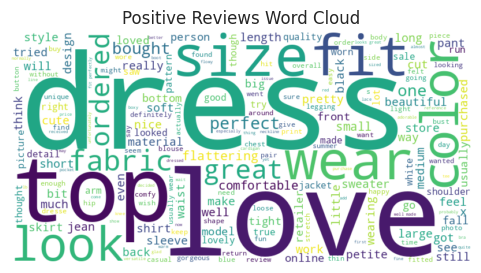

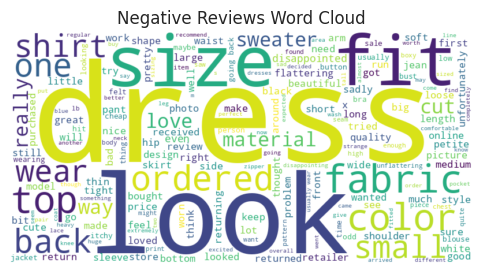

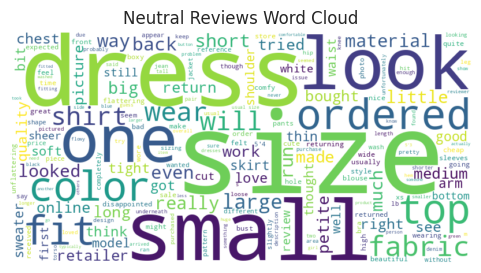

In [19]:
# Filter data for each sentiment category
positive_reviews = df[df['Sentiment Label'] == 'Positive']['Review Text']
negative_reviews = df[df['Sentiment Label'] == 'Negative']['Review Text']
neutral_reviews = df[df['Sentiment Label'] == 'Neutral']['Review Text']
from wordcloud import WordCloud

# Function to generate and plot word clouds
def generate_wordcloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for each sentiment category
generate_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
generate_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')
generate_wordcloud(neutral_reviews, 'Neutral Reviews Word Cloud')

In [20]:
# To build a sentiment prediction model
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Preprocess the data
# 'Sentiment Label' column contains sentiment labels (Positive, Negative, Neutral)
# Clean text data, tokenize, and convert to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['Review Text'])
y = df['Sentiment Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Example: Predict sentiment for new reviews
new_reviews = [
    "This dress is amazing, I love it!",
    "The quality of this product is terrible."
]

# Preprocess new reviews and predict sentiment
new_reviews_features = tfidf_vectorizer.transform(new_reviews)
predicted_sentiment = model.predict(new_reviews_features)
prediction_scores = model.predict_proba(new_reviews_features)

# Initialize a counter variable
counter = 0

# Print reviews with predicted sentiment and prediction scores
# Print reviews with predicted sentiment and prediction scores
for review, sentiment, scores in zip(new_reviews, predicted_sentiment, prediction_scores):
    predicted_sentiment_index = model.classes_.tolist().index(sentiment)
    predicted_sentiment_score = scores[predicted_sentiment_index]

    print(f"Review: '{review}'")
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Prediction Score: {predicted_sentiment_score:.3f}")
    print()

              precision    recall  f1-score   support

    Negative       0.58      0.15      0.24       259
     Neutral       0.97      0.74      0.84       202
    Positive       0.94      0.99      0.97      4237

    accuracy                           0.94      4698
   macro avg       0.83      0.63      0.68      4698
weighted avg       0.92      0.94      0.92      4698

Review: 'This dress is amazing, I love it!'
Predicted Sentiment: Positive
Prediction Score: 0.996

Review: 'The quality of this product is terrible.'
Predicted Sentiment: Negative
Prediction Score: 0.526



In [21]:
# Example: Predict sentiment for new reviews
new_reviews = [
    "The dress looked great online but was disappointing in person. The fabric felt cheap and the stitching was coming loose after just one wear.",

    "Bought a few tops from this brand and they are all amazing. The materials are high-quality and the designs are so chic. Will definitely be shopping here again!",

    "It is scratchy but wearable"
]

# Preprocess new reviews and predict sentiment
new_reviews_features = tfidf_vectorizer.transform(new_reviews)
predicted_sentiment = model.predict(new_reviews_features)
prediction_scores = model.predict_proba(new_reviews_features)

# Initialize a counter variable
counter = 0
# Print reviews with predicted sentiment and prediction scores
for review, sentiment, scores in zip(new_reviews, predicted_sentiment, prediction_scores):
    predicted_sentiment_index = model.classes_.tolist().index(sentiment)
    predicted_sentiment_score = scores[predicted_sentiment_index]

    print(f"Review: '{review}'")
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Prediction Score: {predicted_sentiment_score:.3f}")
    print()

Review: 'The dress looked great online but was disappointing in person. The fabric felt cheap and the stitching was coming loose after just one wear.'
Predicted Sentiment: Negative
Prediction Score: 0.578

Review: 'Bought a few tops from this brand and they are all amazing. The materials are high-quality and the designs are so chic. Will definitely be shopping here again!'
Predicted Sentiment: Positive
Prediction Score: 0.975

Review: 'It is scratchy but wearable'
Predicted Sentiment: Neutral
Prediction Score: 0.627



In [22]:
#LSTM-long short term memory model
#importing required librarires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.callbacks import EarlyStopping

In [23]:
df = df[['Review Text', 'Recommended IND']]
df = df.dropna()
X = df['Review Text']
y = df['Recommended IND']

In [24]:
#Tokenization and Padding:
#Tokenize the text data and pad sequences to ensure uniform lengthT
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, truncating='post')


In [25]:
#Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)


In [26]:
#Build an LSTM model for sentiment analysis#
model = Sequential()
model.add(Embedding(5000, 128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [27]:
#Train the LSTM model on the training data
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
235/235 [==============================] - 125s 513ms/step - loss: 0.3516 - accuracy: 0.8505 - val_loss: 0.2582 - val_accuracy: 0.8874
Epoch 2/5
235/235 [==============================] - 111s 473ms/step - loss: 0.2282 - accuracy: 0.9071 - val_loss: 0.2588 - val_accuracy: 0.8904
Epoch 3/5
235/235 [==============================] - 103s 439ms/step - loss: 0.1894 - accuracy: 0.9240 - val_loss: 0.3358 - val_accuracy: 0.8845
Epoch 4/5
235/235 [==============================] - 104s 441ms/step - loss: 0.1660 - accuracy: 0.9377 - val_loss: 0.2781 - val_accuracy: 0.8885


In [28]:
#Evaluate the model on the test data and check the accuracy.
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


147/147 [==============================] - 8s 53ms/step - loss: 0.2853 - accuracy: 0.8921
Accuracy: 0.8920817375183105


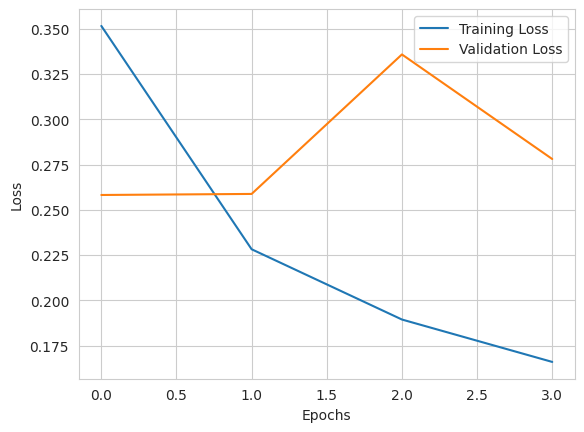

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()